## Скрипт по сбору данных и вычислению топов в рейтинге абитуриентов в удобную табличную форму для различных визуализаций и тд

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup, Tag, NavigableString

In [3]:
def get_page(url: str):
    page = requests.get(url).text
    page = BeautifulSoup(page, 'html.parser')
    return page

In [4]:
def find_table_from_html(page: BeautifulSoup):
    table  = page.find('table')
    if table is None:
        raise ValueError
    return table


In [11]:
table = find_table_from_html(get_page('https://ba.hse.ru/base2024')) # сайт уронен, так что информацию не получить(((

ValueError: 

In [7]:
from pydantic import Tag


def get_data_table_link(table: Tag | NavigableString, key: str):
    link = table.find(string=key).find_parent().find_next_sibling().find('a').attrs['href']
    if link is None:
        raise ValueError
    return link


In [8]:
def get_xls_table(link:str):
    response = requests.get(url=link)
    return response.content

In [ ]:
url = 'hse_eda_applications_list_2024.xlsx'

def write_xls_table(response: bytes, url: str = url):
    with open(file=url, mode='wb') as file:
        file.write(response.content)
        return file
    

In [ ]:
from requests import get


xlsx_file = write_xls_table(get_xls_table(get_data_table_link(table)))

NameError: name 'table' is not defined

In [ ]:
from typing import Iterable


def get_key_params(tags: Iterable[tuple[str, bool]], url: str = url, save_to_xls: bool = False):
    keys = [tag[0] for tag in tags]
    orders = [tag[1] for tag in tags]
    xlsx_file = pd.read_excel(url, header=14)
    xlsx_file.sort_values(by=keys, 
                       ascending=orders, inplace=True)
    if save_to_xls:
        xlsx_file.to_excel('hse_eda_applications_list_2024_formatted.xlsx')

    return xlsx_file


(('Право поступления\nбез вступительных испытаний', True),)


In [12]:
xlsx_file = pd.read_excel('hse_eda_applications_list_2024.xlsx', header=14)
xlsx_file.drop(xlsx_file[((xlsx_file['Сумма конкурсных баллов'] < 235) & 
                         (xlsx_file['Право поступления\nбез вступительных испытаний'] == 'Нет'))].index, inplace=True)
xlsx_file

FileNotFoundError: [Errno 2] No such file or directory: 'hse_eda_applications_list_2024.xlsx'

In [ ]:
xlsx_file.to_excel('hse_eda_applications_list_2024_formatted.xlsx')

In [ ]:
import matplotlib.pyplot as plt

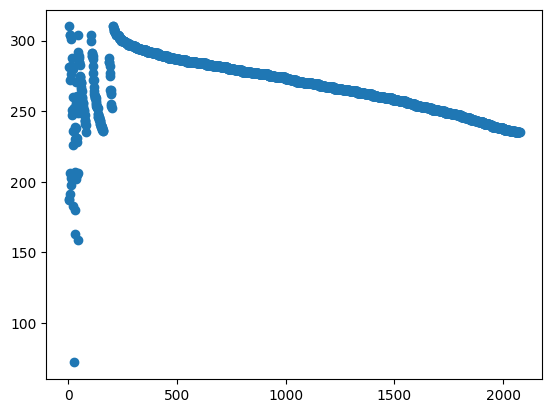

In [ ]:
plt.scatter(xlsx_file['№ п/п'], xlsx_file["Сумма конкурсных баллов"])
plt.show()